In [ ]:
%pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
#df= pd.read_csv('https://lukedb.co/python_csv')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

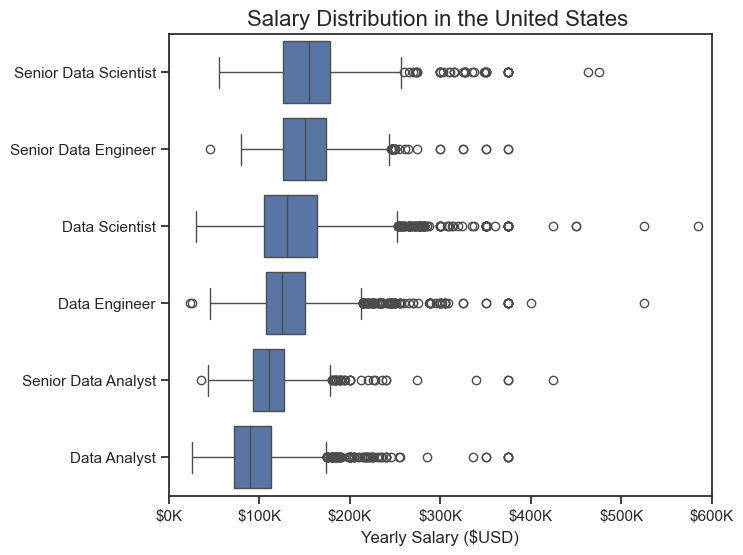

In [31]:
country5='United States'
df_data_us=df[df['job_country']==country5].dropna(subset=['salary_year_avg']).copy()

#value counts of titles, top 6 by index, convert to list
job_titles=df_data_us['job_title_short'].value_counts().index[:6].tolist()
df_top6 = df_data_us[df_data_us['job_title_short'].isin(job_titles)]


job_order=df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
f, ax = plt.subplots(figsize=(7, 6))
sns.set_theme(style='ticks')
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title(f'Salary Distribution in the {country5} ', fontsize=16)
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [32]:
job6='Data Analyst'
country6='United States'
df_next=df[(df['job_title_short']==job6)&(df['job_country']==country6)].copy()
df_next=df_next.dropna(subset='salary_year_avg')
df_next=df_next.explode('job_skills')
df_next=df_next.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_data_pay=df_next.sort_values(by='median', ascending=False).head(10)
df_data_count=df_next.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

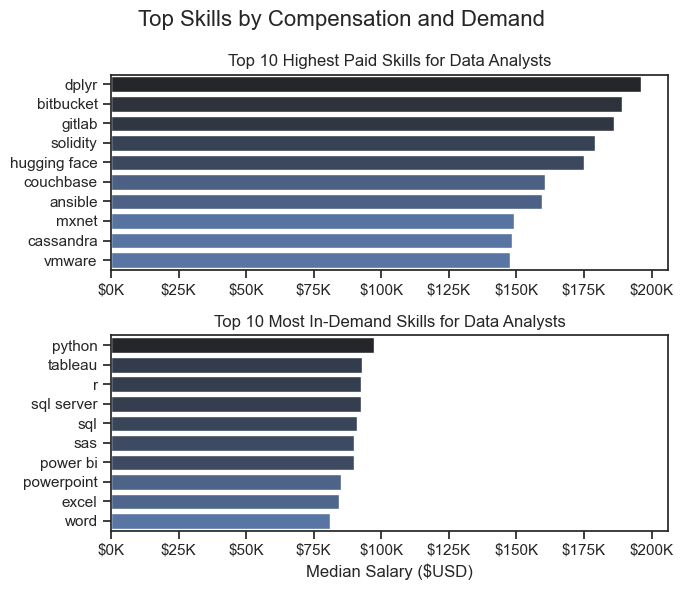

In [34]:
#Subplots
fig, ax = plt.subplots(2,1, figsize=(7,6))

#Can set a theme for seaborn
sns.set_theme(style='ticks')

#note the b_r for palette means to reverse the dark blue coloring direction
# hue is what to color off of, palette selection is the color
sns.barplot(data=df_data_pay, x='median', y=df_data_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_data_count, x='median', y=df_data_count.index, ax=ax[1], hue='median', palette='dark:b_r')
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.suptitle('Top Skills by Compensation and Demand', fontsize=16)
fig.tight_layout()
